<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/LinLat_on_dirt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import sklearn
import numpy as np

In [ ]:
dataset = sklearn.datasets.fetch_covtype(as_frame=True)
display(dataset['data'].head(10))
display(dataset['target'])

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
targ_data = enc.fit_transform(np.array(dataset['target']).reshape(-1, 1))


AttributeError: ignored

In [76]:
abrg_A = dataset['data'].iloc[:10000,:]
max_vals = np.max(abrg_A,axis=0)
max_vals = [1 if v==0 else v for v in max_vals ]
abrg_A = abrg_A/max_vals
abrg_B =enc.fit_transform(np.array(dataset['target']).reshape(-1, 1))[:10000,:]
abrg_B = abrg_B.toarray()



In [74]:

print

In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [77]:
def als_round(A_,B_,X_,Y_,to_plot=False,verbose=False,first_it=False):
    '''
    A = L*X
    La=A*X'
    Xb = Lb' * A
    Ab = Lb * Xn

    B = L*Y
    Lb=B*Y'
    Ya = La' * B
    Ba = La * Yn
    '''

    def regularize(L):
        L=L-np.mean(L)
        L=L/np.amax(np.abs(L))
        return(L)

    if to_plot:
        if first_it:
            L_0 = np.zeros([X_.shape[0],Y_.shape[1]])
            fig,ax = plt.subplots(1,6,figsize=(12,2))
            ax[0].imshow(A_)
            ax[1].imshow(X_)
            ax[2].imshow(L_0)
            ax[3].imshow(L_0)
            ax[4].imshow(Y_)
            ax[5].imshow(B_)

            ax[0].set_title('A_')
            ax[1].set_title('X_init')
            ax[4].set_title('Y_init')
            ax[5].set_title('B_')
            plt.show()

    L_a = np.dot(A_,np.linalg.pinv(X_))
    L_a = regularize(L_a)
    Y_a = np.dot(np.linalg.pinv(L_a),B_)

    L_b = np.dot(B_,np.linalg.pinv(Y_a)) ## pinv(Y_)
    L_b = regularize(L_b)
    X_b = np.dot(np.linalg.pinv(L_b),A_)
    

    A_b = np.dot(L_b,X_b)
    B_a = np.dot(L_a,Y_a)

    A_er = np.linalg.norm(A_-A_b)
    B_er = np.linalg.norm(B_-B_a)
    L_er = np.linalg.norm(L_a-L_b)

    if verbose: print(A_er,B_er,L_er)

    if to_plot:
        fig,ax = plt.subplots(1,6,figsize=(12,2))
        ax[0].imshow(A_)
        ax[1].imshow(X_b)
        ax[2].imshow(L_a)
        ax[3].imshow(L_b)
        ax[4].imshow(Y_a)
        ax[5].imshow(B_)

        ax[0].set_title('A_')
        ax[1].set_title('X_b')
        ax[2].set_title('L_a')
        ax[3].set_title('L_b')
        ax[4].set_title('Y_a')
        ax[5].set_title('B_')
        plt.show()
    return X_b, Y_a, L_a, L_b

In [78]:
from matplotlib import pyplot as plt
to_plot = False
verbose = False
n = abrg_A.shape[0]
k = abrg_A.shape[1]
j = abrg_B.shape[1]
l_dim = j

X_ = np.random.rand(l_dim,k)
Y_ = np.random.rand(l_dim,j)



to_plot = False
verbose = True
i_n = 500
for i_ in range(i_n):
    X_, Y_ , L_a, L_b= als_round(abrg_A,abrg_B,X_,Y_,to_plot=to_plot,verbose = verbose,first_it=i_==0)

120.57538673897591 84.24171138882558 111.12815878804098
120.57538673897753 75.88293268810426 74.22497568071708
120.57538673897756 75.88293268809876 75.97498790836806
120.57538673897719 75.88293268811607 76.72001549817286
120.57538673897804 75.88293268889964 77.11669915084148
120.57538673905617 75.88293266888924 77.32741599481173
120.57538673992855 75.8829315800309 77.43655515022388
120.5753875236392 75.88294184868884 77.4920191943731
120.57850203971185 75.88308036331772 77.52052952883616
121.53224143884614 75.88450366778773 77.46223769507935
120.57542584612071 76.39084398704605 69.55755127241665
120.57728593825074 75.88326355040194 68.50276709649792
121.34931064257714 75.86665498186343 68.48077816151708
123.53883490631303 76.37499046198572 134.30012860571196
120.57538675436655 76.36031186561006 87.0705251215904
120.57544293699358 75.88294151780772 72.20996614606334
120.57735543838213 75.88372042770045 69.81728295594854
120.5765428571223 75.8690478284877 108.51137523178065
120.622104774

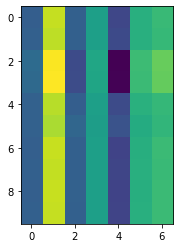

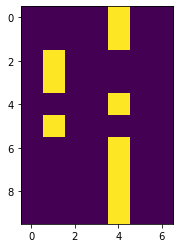

In [84]:
test_n = 10
test_A = dataset['data'].iloc[:test_n,:]
test_B =enc.fit_transform(np.array(dataset['target']).reshape(-1, 1))[:test_n,:].toarray()


'''A = L*X; La=A*X'; B = L*Y'''
''' B = (A*X')*Y '''

B_pred = np.dot(np.dot(test_A,np.linalg.pinv(X_)),Y_)
plt.imshow(B_pred)
plt.show()
plt.imshow(test_B)